In [88]:
import pandas as pd
from typing import List
import glob
import pathlib
import re
import matplotlib as mpl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from results import METHOD_NAME, ABLATIONS, BASELINES, scrape_latex

plt.rcParams["font.family"] = "Times New Roman"

from IPython.core.debugger import set_trace

%matplotlib inline
%load_ext autoreload
%autoreload 2

#matplotlib.use('TkAgg')

# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


FILE_SAVE = '/Users/noname/scratch/saved/domainbed_results'

# get latex files
latex_files = []
old_latex_files = []
folders = ["33_pacs", "66_pacs", '33_vlcs', '66_vlcs', '66', '33']
for folder in tqdm(folders):
    latex_files.extend(glob.glob(f'/Users/noname/scratch/saved/domainbed_results/rerun/{folder}/**/*Track*.tex', recursive=True))
    old_latex_files.extend(glob.glob(f'/Users/noname/scratch/saved/domainbed_results/{folder}/**/*All*.tex', recursive=True))

    
print("Number of latex files: ", len(latex_files))
# convert latex documents to a pandas dataframe
data = []
# scrape each latex file
for file in latex_files:
    #print('[info] processing: ', file)
    data.extend(scrape_latex(file))

# convert to pandas data frame
df = pd.DataFrame.from_dict(data).sort_values(by=["baseline", "algorithm"], ascending=False).reset_index(drop=True)

# OLD *************************************************************************
print("Number of old latex files: ", len(old_latex_files))
# convert latex documents to a pandas dataframe
data = []
# scrape each latex file
for file in old_latex_files:
    #print('[info] processing: ', file)
    data.extend(scrape_latex(file))

# convert to pandas data frame
df_old = pd.DataFrame.from_dict(data).sort_values(by=["baseline", "algorithm"], ascending=False).reset_index(drop=True)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  8.49it/s]


Number of latex files:  36
Number of old latex files:  72


## Validate results with domainbed_results
- These give different values than the previous runs, therefore for now we use the previous high (66) stats and these low stats (33) with the previous ones making up the difference

In [89]:
data = df.loc[(df['evaluation_metric'].isin(['nacc']))&(df['selection_metric'].isin(['nacc']))&(df['dataset'].isin(['PACS', 'OfficeHome', 'VLCS']))&(df['overlap'].isin(['33', '66']))][df['algorithm'].isin(ABLATIONS+BASELINES)].sort_values(by='algorithm', ascending=True).reset_index(drop=True)
pd.pivot_table(data=data, values=['evaluation_value', 'evaluation_std'], index=['selection_metric', 'evaluation_metric','algorithm'], columns=['dataset', 'overlap'], aggfunc=np.mean)

/var/folders/kr/gtghwjcs55q1lrp82b0qv62h0000gn/T/ipykernel_75980/2864032026.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = df.loc[(df['evaluation_metric'].isin(['nacc']))&(df['selection_metric'].isin(['nacc']))&(df['dataset'].isin(['PACS', 'OfficeHome', 'VLCS']))&(df['overlap'].isin(['33', '66']))][df['algorithm'].isin(ABLATIONS+BASELINES)].sort_values(by='algorithm', ascending=True).reset_index(drop=True)


evaluation_std                 \
dataset                                                PACS      VLCS        
overlap                                                  33   66   33   66   
selection_metric evaluation_metric algorithm                                 
nacc             nacc              ARM                  1.3  2.9  0.9  1.4   
                                   CAD                  0.9  0.7  1.1  7.5   
                                   CORAL                0.8  1.0  1.4  4.2   
                                   ERM                  0.5  2.2  0.7  3.3   
                                   FOND                 1.4  1.1  0.5  5.9   
                                   FOND\F               0.3  0.7  1.3  7.1   
                                   FOND\FB              0.8  0.8  2.0  4.2   
                                   FOND\FBA             1.0  0.7  0.7  4.4   
                                   MLDG                 0.1  0.5  0.4  3.4   
                                   SelfReg              0.4  1.2  1.5  0.2   
                                   Transfer             1.8  1.6  0.6  3.0   

                                             evaluation_value              \
dataset                                                  PACS        VLCS   
overlap                                                    33    66    33   
selection_metric evaluation_metric algorithm                                
nacc             nacc              ARM                   36.8  16.2  47.7   
                                   CAD                   33.0  13.1  46.6   
                                   CORAL                 33.3  13.7  45.2   
                                   ERM                   36.5  14.5  47.6   
                                   FOND                  36.7  20.5  48.0   
                                   FOND\F                34.5  16.0  46.4   
                                   FOND\FB               33.8  16.1  50.0   
                                   FOND\FBA              34.4  14.0  46.3   
                                   MLDG                  38.0  13.8  49.2   
                                   SelfReg               32.4  13.4  45.4   
                                   Transfer              36.4  16.0  48.3   

                                                    
dataset                                             
overlap                                         66  
selection_metric evaluation_metric algorithm        
nacc             nacc              ARM        49.0  
                                   CAD        47.8  
                                   CORAL      49.8  
                                   ERM        51.8  
                                   FOND       50.3  
                                   FOND\F     52.1  
                                   FOND\FB    45.1  
                                   FOND\FBA   45.6  
                                   MLDG       45.2  
                                   SelfReg    41.9  
                                   Transfer   48.9

## Old Domainbed results

In [91]:
data = df_old.loc[(df_old['evaluation_metric'].isin(['nacc']))&(df_old['selection_metric'].isin(['nacc']))&(df_old['dataset'].isin(['PACS', 'OfficeHome', 'VLCS']))&(df_old['overlap'].isin(['33', '66']))&(df_old['algorithm'].isin(ABLATIONS+BASELINES))].sort_values(by='algorithm', ascending=True).reset_index(drop=True)
pd.pivot_table(data=data, values=['evaluation_value', 'evaluation_std'], index=['selection_metric', 'evaluation_metric','algorithm'], columns=['dataset', 'overlap'], aggfunc=np.mean)

evaluation_std                 \
dataset                                          OfficeHome      PACS        
overlap                                                  33   66   33   66   
selection_metric evaluation_metric algorithm                                 
nacc             nacc              ARM                  0.1  0.2  1.3  2.9   
                                   CAD                  1.2  1.4  0.9  0.7   
                                   CORAL                0.2  0.2  0.8  1.0   
                                   ERM                  0.4  0.6  0.5  2.2   
                                   FOND                 0.3  0.4  1.2  0.6   
                                   FOND\F               0.6  0.6  0.5  1.4   
                                   FOND\FB              0.5  0.7  0.5  0.6   
                                   FOND\FBA             0.4  0.5  1.2  1.3   
                                   MLDG                 0.1  0.7  0.1  0.5   
                                   SelfReg              0.3  0.6  0.4  1.2   
                                   Transfer             0.3  0.2  1.8  1.6   

                                                       evaluation_value        \
dataset                                      VLCS            OfficeHome         
overlap                                        33   66               33    66   
selection_metric evaluation_metric algorithm                                    
nacc             nacc              ARM        0.9  1.4             39.0  38.4   
                                   CAD        1.5  5.8             36.9  36.4   
                                   CORAL      1.6  4.2             40.7  38.9   
                                   ERM        1.0  3.3             38.5  37.5   
                                   FOND       0.4  3.5             40.3  40.6   
                                   FOND\F     1.0  6.0             40.6  40.8   
                                   FOND\FB    0.2  2.3             41.0  41.7   
                                   FOND\FBA   1.0  2.8             41.0  39.1   
                                   MLDG       2.0  3.4             38.1  37.4   
                                   SelfReg    1.2  0.2             40.0  39.5   
                                   Transfer   0.6  3.0             38.1  36.8   

                                                                      
dataset                                       PACS        VLCS        
overlap                                         33    66    33    66  
selection_metric evaluation_metric algorithm                          
nacc             nacc              ARM        36.8  16.2  47.7  49.0  
                                   CAD        33.0  13.1  45.5  51.7  
                                   CORAL      33.3  13.7  45.5  49.8  
                                   ERM        36.5  14.7  50.7  51.8  
                                   FOND       35.3  19.1  48.0  72.1  
                                   FOND\F     35.3  17.5  48.5  51.7  
                                   FOND\FB    33.2  15.4  50.0  44.0  
                                   FOND\FBA   35.4  17.3  46.6  51.3  
                                   MLDG       38.0  13.8  50.8  45.2  
                                   SelfReg    32.4  13.4  46.6  41.9  
                                   Transfer   36.4  16.0  48.3  48.9

## Per-Class Accuracy 33-66

/var/folders/kr/gtghwjcs55q1lrp82b0qv62h0000gn/T/ipykernel_75980/3287696106.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Low', 'High'])
/var/folders/kr/gtghwjcs55q1lrp82b0qv62h0000gn/T/ipykernel_75980/3287696106.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Low', 'High'])


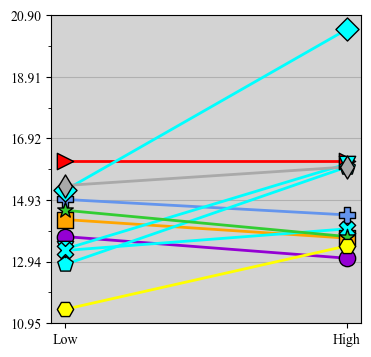

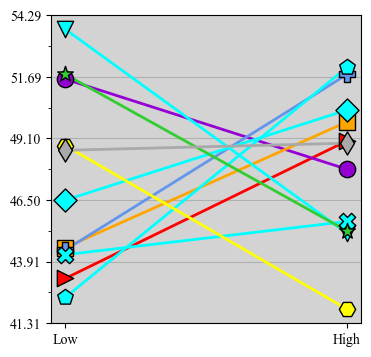

In [94]:
import numpy as np
from matplotlib.ticker import AutoMinorLocator, LinearLocator, MaxNLocator, FormatStrFormatter
import itertools
from results import ABLATIONS, ABLATION_MARKERS, BASELINE_MARKERS, BASE_COLORS, AXIS_LABELS

def plot_results(df, selec_metric, eval_metric, dataset):
    fig, ax = plt.subplots(figsize=(4,4))
    
    data = df.loc[
        (df['dataset'] == dataset) &
        (df['selection_metric'] == selec_metric) &
        (df['evaluation_metric'].isin(eval_metric))
    ].sort_values(by=['algorithm'], ascending=False)
    
    # split data by class-shared setting
    data = data.groupby(["algorithm", 'overlap']).mean(numeric_only=True)
    data_value = data['evaluation_value'].unstack().reset_index(names="algorithm")
    
    i_p = 0
    i_b = 0
    for i, row in data_value.iterrows():
        if row["algorithm"] in ABLATIONS:
            color = "cyan"
            color_l = "black"
            marker = ABLATION_MARKERS[i_p]
            i_p += 1
        else:
            color = BASE_COLORS[i_b]
            color_l = color
            marker = BASELINE_MARKERS[i_b]
            i_b += 1
            
        ax.plot(['33', '66'], [row['33'], row['66']], label='_nolegend_', color=color, zorder=10, linewidth=2)
        ax.scatter(['33', '66'], [row['33'], row['66']], label=row['algorithm'], 
                   color=color, marker=marker, edgecolor="black", zorder=15, 
                   s=mpl.rcParams['lines.markersize']**2.75)


    # LABELS    
    #ax.set_title(dataset)
    #ax.set_ylabel(f"Class {[int(sub[4:]) for sub in eval_metric]} Accuracy", fontsize=12)
    #ax.set_xlabel('Shared-Class Distribution Setting', fontsize=12)
    ax.set_xticklabels(['Low', 'High'])
    #ax.legend(loc="center left", bbox_to_anchor=(1,0.5))
    
    # GRID
    ax.grid(axis="y", which="major")

    ax.yaxis.set_minor_locator(AutoMinorLocator(2))
    #ax.xaxis.set_minor_locator(AutoMinorLocator(2))


    #ax.get_yaxis().set_major_locator(MaxNLocator(integer=True, nbins=6, min_n_ticks=6))
    #ax.get_xaxis().set_major_locator(MaxNLocator(integer=True, nbins=7, min_n_ticks=7))

    ax.get_yaxis().set_major_locator(LinearLocator(numticks=6))
    #ax.get_xaxis().set_major_locator(LinearLocator(numticks=6))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    #ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

    ax.set_facecolor('lightgray')
    
    return fig, ax

# PACS
fig, ax = plot_results(df=df, selec_metric="nacc", eval_metric=["accC1", "accC6"], dataset="PACS")
fig.savefig(os.path.join(FILE_SAVE, 'track_pacs_plot.pdf'), bbox_inches='tight', format='pdf')
# VLCS
fig, ax = plot_results(df=df, selec_metric="nacc", eval_metric=["accC1"], dataset="VLCS")
fig.savefig(os.path.join(FILE_SAVE, 'track_pacs_plot.pdf'), bbox_inches='tight', format='pdf')



## Legend

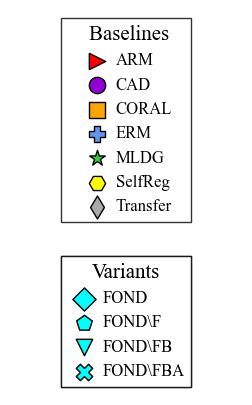

In [75]:
fig_leg = plt.figure(figsize=(3, 5))
ax_leg = fig_leg.add_subplot(111)
ax_leg.axis('off')

handles, labels = ax.get_legend_handles_labels()
# get baselines
baselines = ([], [])
ablations = ([], [])
for handle, label in zip(handles, labels):
    if label in BASELINES:
        baselines[0].append(handle)
        baselines[1].append(label)
    else:
        ablations[0].append(handle)
        ablations[1].append(label)

baseline_legend = ax_leg.legend(
    title="    Baselines   ",
    handles=baselines[0], 
    labels=baselines[1], 
    markerscale=1,
    #markerscale=5,
    #loc='lower center', 
    #ncols=len(baselines[0]),
#     ncols=len(baselines[0])//2,
#     bbox_to_anchor=(0.515, 0.88),
    loc='upper center', 
    #bbox_to_anchor=(0.9,0.43), 
    #columnspacing=0.2,
    handletextpad=0.1,
    #labelspacing=0.4,
    fontsize=12,
    title_fontsize=15,
    fancybox=False,
    edgecolor='black',
    #bbox_to_anchor=(1,0.65),
    )


# Create the ablation class legend

# legend = fig.legend(
#     title="Ablations",
#     handles=ablations[0], 
#     labels=ablations[1], 
#     #ncols=8, 
#     loc='upper left', 
#     bbox_to_anchor=(1, 0.5), 
#     #fontsize=12, 
#     #columnspacing=0.2,
#     title_fontsize=15,
# )
variant_legend = ax_leg.legend(
    title="Variants",
    handles=ablations[0], 
    labels=ablations[1], 
    markerscale=1,
    #ncols=len(ablations[0])//2, 
#     loc='center left', 
#     bbox_to_anchor=(0.9,0.5),
    loc='lower center',
    #ncols=len(ablations[0]),
    #bbox_to_anchor=(0.9, 0.43),
    fontsize=12, 
    columnspacing=0,
    handletextpad=0.1,
    #labelspacing=0.4,
    title_fontsize=15,
    fancybox=False,
    edgecolor='black',
)

# Add the legend manually to the current Axes.
ax_leg.add_artist(baseline_legend)
ax_leg.add_artist(variant_legend)

#fig_leg.subplots_adjust(bottom=0.5, top=0.8)

# Save figure
fig_leg.savefig(os.path.join(FILE_SAVE, 'track_plot.pdf'), bbox_inches='tight', format='pdf')